# Data Description






* **Dataset** : Breast Cancer Wisconsin (Diagnostic) Data Set
 
* ** Objective **: Predict whether the sample is benign or malignant
 
* ** Short Description **: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. There are 569 data points (images) in total.

* ** Features **:Ten real-valued features are computed for each cell nucleus, including radius, texture, smoothness, perimeter, concavity. Also the mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image. There are total 30 features.
 
* ** Target Variable **: "Diagnosis" - has two classes 1) Malignant and 2) Benign


## 1. Import Data, Data Preprocessing and Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
main_data = pd.read_csv("data.csv")
main_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


** Looks like "Unnamed:32" has NaN . Need to check if other columns have NaN as well.**

In [3]:
main_data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

** The other columns seem to have no NaN. We should take a look at the column names to get familiar with the data **

In [4]:
# feature names as a list
col = main_data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
main_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
main_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



* **"Unnamed:32" feature does not seems to be useful. **


* **"id" is mostly not useful as per common understanding. **


* **"diagnosis" is target variable and we should remove it from feature list and store separately **
<font color='blue'></font>

In [7]:
y = main_data['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [8]:
 # storing the outcome labels in y 
list = ['Unnamed: 32','id','diagnosis']
x = main_data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


** We have now separated the data into features (x) and target variable (y) **

In [9]:
# mapping  M to 0 and B to 1 and inserting again in main data
main_data['diagnosis'] = main_data['diagnosis'].map({'M':1,'B':0})  
main_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


** Lets now look at the target variable statistics **

Number of Benign:  357
Number of Malignant :  212


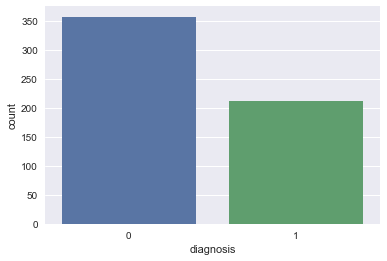

In [10]:
ax = sns.countplot(main_data['diagnosis'],label="Count")  
B, M = main_data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

** We have ~37% of the patients to be diagnosed as malignant. Doesn't look like resampling is necessary (but we may revisit if necessary) **

 # 2. Feature Selection
 
 
 

There are 30 features in the dataset. We should aim to see if any of the features are correlated with others.
I am guessing that this will be the case since we have features like radius, area and perimeter which are likely
to be strongly correlated.

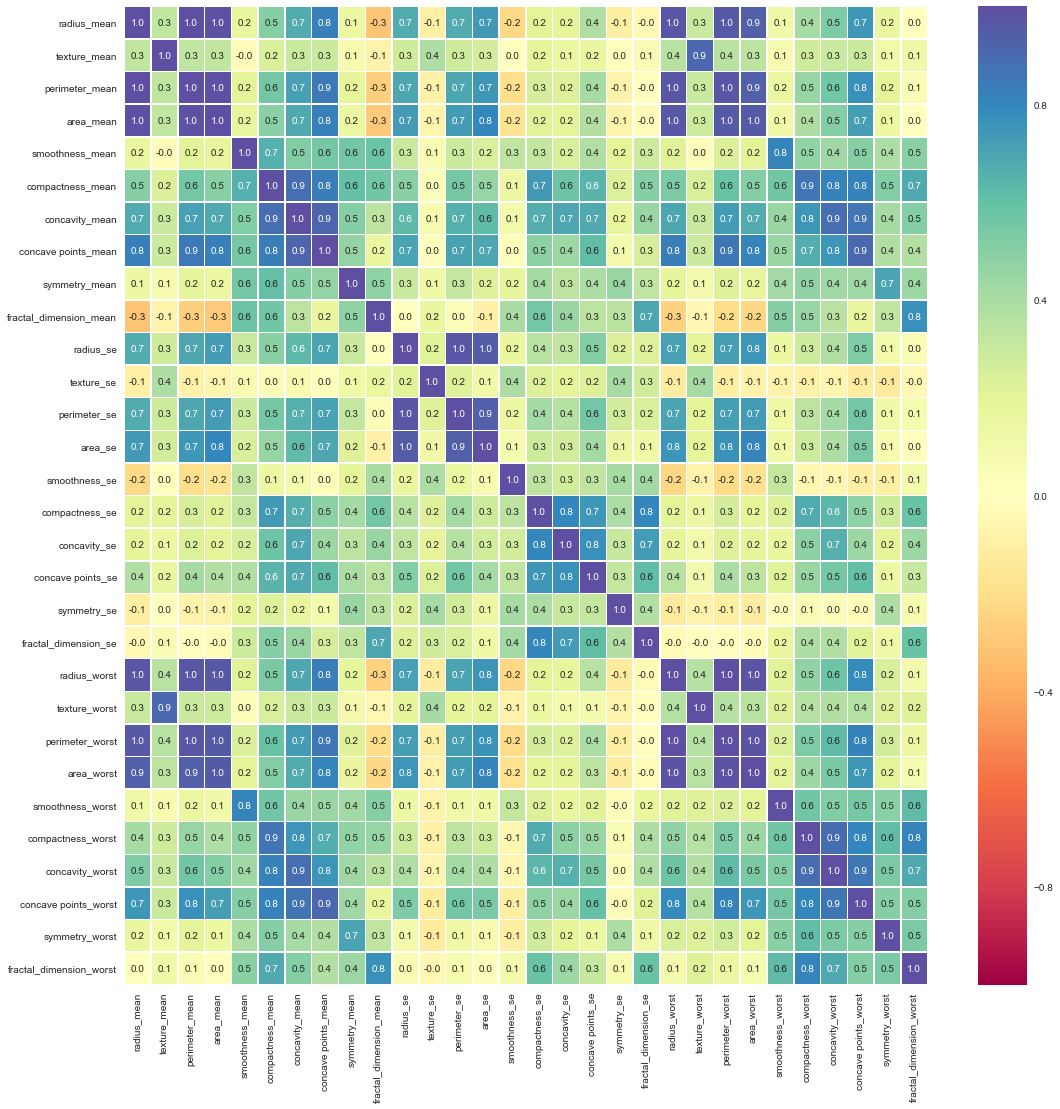

In [11]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap= 'Spectral')

**As I guessed several features are strongly correlated and we can drop some of those features as they are not going to add new information. E.g., 'area_mean' is strongly coorelated with 'perimeter_mean', 'radius_mean', 'radius_worst','perimeter_worst' and 'area_worst', so these features should be dropped. I have made a list of features I can drop based on the above correlation matrix as shown below.**

In [12]:
# Dropping few (14) features

drop_list2 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst','concavity_worst']
x_1 = x.drop(drop_list2,axis = 1 )       
print('No. of features left is : ', len(x_1.columns))


No. of features left is :  16


**Lets now look again at the correlation matrix and check there is any remaining feature which can be dropped... **

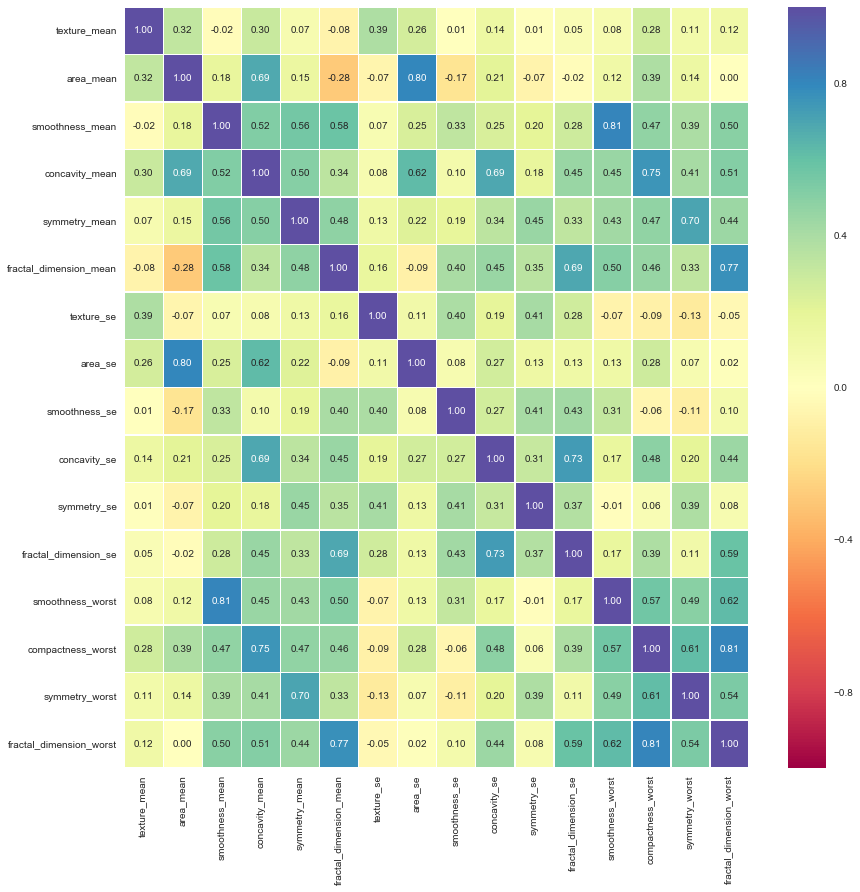

In [13]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap= 'Spectral')
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2.5})

** Looks like the highest correlation is 0.81. We can revisit this section later, if we want, to see if we should drop some more features**

In [14]:
print(x_1.columns)

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


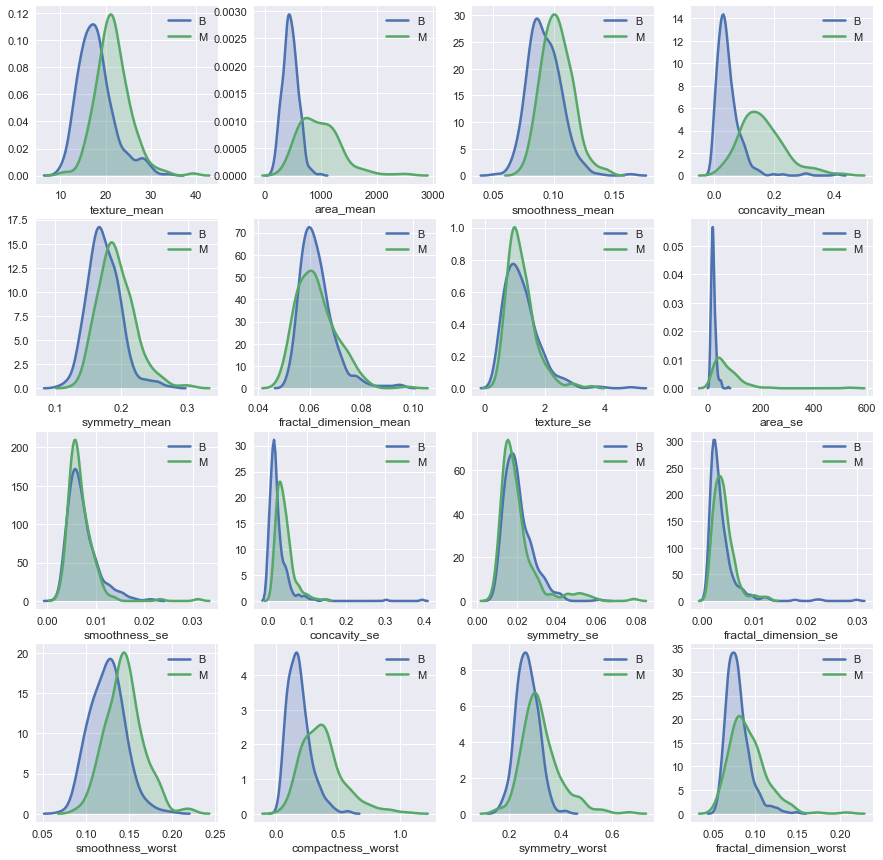

In [15]:
# Lets try to see if the presence of malignancy shifts the distribution for each of these features

x1_dropped_features_with_BM = pd.concat([x_1, y],axis=1)
f, axes = plt.subplots(4, 4, figsize=(15, 15))
i=0
for col in x1_dropped_features_with_BM.columns:
    if col != "diagnosis":
        row=i//4
        column=i%4
        gr = x1_dropped_features_with_BM.groupby('diagnosis')[col]
        #gr.describe()
        for label, arr in gr:
           sns.kdeplot(arr, label=label, shade=True, ax=axes[row, column])
        axes[row][column].set_xlabel(col)
        i+=1


** From the kdeplot it seems like the most important features could be : area_mean, concavity_mean and compactness_worst . We will verify it after model fitting**

#  3. Model Selection and Prediction Accuracy

We try to fit a very basic machine learning model(DecisionTreeClassifier) and see its performance . Also check if our intuition matches with reality in feature importance. 

The advantages of decision tree are the following:
- Simple model to interpret and get intuition
- Relatively robust to outliers
- Does not need too much pre-processing

Disadvantage:
- Prone to overfitting if depth is large. The overfitting problem can be resolved to some extent by using RandomForest. But for the sake of this demonstration lets explore decision Trees.


# 3.1. Fit a Decision Tree Classifier

In [16]:
## do Train test split of X and Y data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.20, random_state=42)

In [17]:
## Importing necessary modules
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

Accuracy is:  0.921052631579
Classification report: 
              precision    recall  f1-score   support

          B       0.97      0.90      0.93        71
          M       0.85      0.95      0.90        43

avg / total       0.93      0.92      0.92       114

Cohen Kappa Score is:  0.835734870317

 Confusion Matrix: 



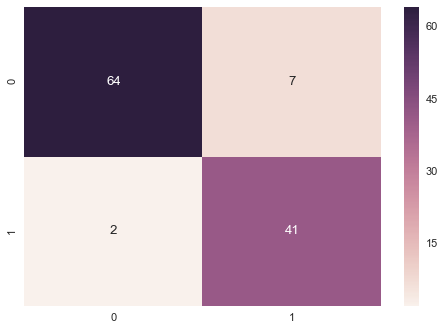

In [18]:
## Getting accuracy score and confusion matrix for a specific model

clf_dtc = DecisionTreeClassifier(random_state=42)      
clf_dtc = clf_dtc.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_dtc.predict(X_test))
ckappa=cohen_kappa_score(y_test, clf_dtc.predict(X_test))

cm = confusion_matrix(y_test,clf_dtc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print('Accuracy is: ',ac)
print('Classification report: \n',classification_report(y_test, clf_dtc.predict(X_test)))
print('Cohen Kappa Score is: ',ckappa)
print('\n Confusion Matrix: \n')


-  Just by applying decision tree classifier and without hyperparameter optimization we get 92% accuracy and F1-score of 0.92. Looks good so far but we can try and optimize hyperparameter to squeeze more performance out

-   Cohen Kappa score is 0.83 (close to 1) so our model is significantly better than a baseline accuracy

-  In this notebook we have generally used accuracy score as the primary metric to optimize our models. But we should note that maybe we could also use F(beta) score with a high beta as in this case we would like to maximize recall (minimise false negative).



# 3.2. Grid search to optimize Decision Tree

In [19]:
# Hyper parameter tuning by Grid search
def fit_model(X, y):    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.3, train_size=None, random_state=0)

    classifier = DecisionTreeClassifier(random_state=42)
    #classifier = GradientBoostingClassifier(n_estimators=50,  random_state=42)
    params = {'max_depth':range(1,10)}
    scoring_fnc = make_scorer(accuracy_score)#creates a pointer to the performance metric so that GridSearchCV can call it
    grid = GridSearchCV(classifier,params,scoring=scoring_fnc,cv=cv_sets)
 
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    #print(grid.cv_results_['mean_test_score'])
    #print(grid.cv_results_['mean_train_score'])
     # Return the optimal model after fitting the data
    return grid.best_estimator_

In [20]:
def Predict_scores (estimator,X_test,y_test):
    ac = accuracy_score(y_test,estimator.predict(X_test))
    ckappa=cohen_kappa_score(y_test, estimator.predict(X_test))

    cm = confusion_matrix(y_test,estimator.predict(X_test))
    sns.heatmap(cm,annot=True,fmt="d")
    
    print('Accuracy is: ',ac)
    print('Classification report: \n',classification_report(y_test, clf_dtc.predict(X_test)))
    print('Cohen Kappa Score is: ',ckappa)
    print('\n Confusion Matrix: \n')

The optimal estimator is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
Accuracy is:  0.947368421053
Classification report: 
              precision    recall  f1-score   support

          B       0.97      0.90      0.93        71
          M       0.85      0.95      0.90        43

avg / total       0.93      0.92      0.92       114

Cohen Kappa Score is:  0.885885885886

 Confusion Matrix: 



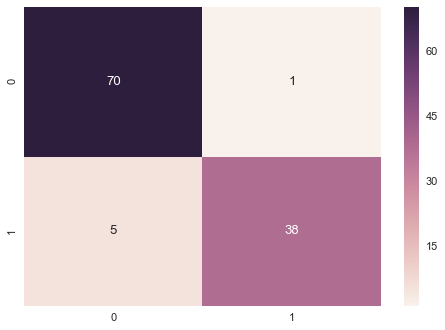

In [21]:
clr_dtc = fit_model(X_train, y_train)
print ('The optimal estimator is: \n',clr_dtc)
Predict_scores(clr_dtc,X_test,y_test)

** We managed to get some more performance out of the model by Grid Search for optimal choice of max_depth=4 . **
** Now lets look at feature importances **

## 3.3. Final feature selection

In this section I shall try to see if I can build my model using a lesser number of features.Fewer attributes is desirable because it reduces the complexity of the model, and a simpler model is simpler to understand and explain.

I will try to extract feature (Gini) importance from the optimized model and then see if there are any irrelevant features we could drop.

** Gini importance **

[Cited from:https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#giniimp]

Every time a split of a node is made on variable m the gini impurity criterion for the two descendent nodes is less than the parent node. Adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure 

In [22]:
# Feature importance
names = x_1.columns
print ("Features sorted by their score:")
feat_pref = sorted(zip(map(lambda x: round(x, 4), clr_dtc.feature_importances_), names),reverse=True)
x_arr=[]
y_arr=[]
for k1,k2 in feat_pref:
    x_arr.append(k1)
    y_arr.append(k2)
feat_pref_df=pd.DataFrame(x_arr,index=y_arr,columns=['Importance'])
feat_pref_df.head(20)

Features sorted by their score:


,Importance
area_mean,0.6237
compactness_worst,0.1609
area_se,0.0894
smoothness_worst,0.0428
concavity_mean,0.0269
fractal_dimension_se,0.0198
texture_mean,0.0182
smoothness_mean,0.0093
symmetry_worst,0.0089
texture_se,0.0000


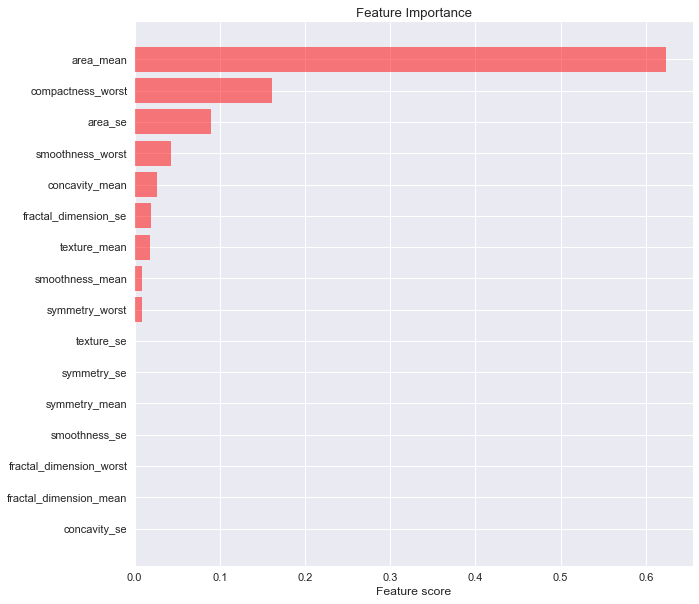

In [23]:
feat_pref = sorted(zip(map(lambda x: round(x, 4), clr_dtc.feature_importances_), names),reverse=False)
x_arr=[]
y_arr=[]
for k1,k2 in feat_pref:
    x_arr.append(k1)
    y_arr.append(k2)
y_pos = np.arange(len(y_arr))
plt.figure(figsize=(10,10))
plt.barh(y_pos, x_arr, align='center', alpha=0.5,color='red')
plt.yticks(y_pos, y_arr)
plt.xlabel('Feature score')
plt.title('Feature Importance')


** From the table and graph we can see that our intuition was quite good. The top 3 features can capture ~90% of the 
feature importance score. We had guessed some of them from kdeplots. **

In [24]:
#We only take 4 most important features
#x_2 = x_1[['area_mean','compactness_worst','area_se','smoothness_worst']]
x_2 = x_1[['area_mean','compactness_worst','area_se','smoothness_worst']]
x_2.head()

,area_mean,compactness_worst,area_se,smoothness_worst
0,1001.0,0.6656,153.40,0.1622
1,1326.0,0.1866,74.08,0.1238
2,1203.0,0.4245,94.03,0.1444
3,386.1,0.8663,27.23,0.2098
4,1297.0,0.2050,94.44,0.1374


Accuracy is:  0.938596491228
Classification report: 
              precision    recall  f1-score   support

          B       0.94      0.96      0.95        71
          M       0.93      0.91      0.92        43

avg / total       0.94      0.94      0.94       114

Cohen Kappa Score is:  0.868706811451

 Confusion Matrix: 



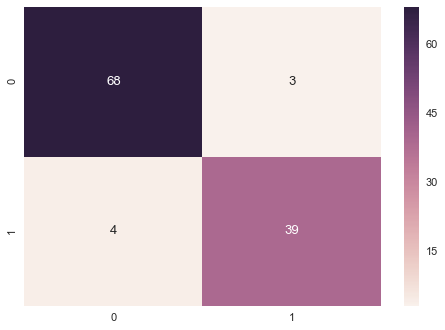

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x_2, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier(max_depth=4,random_state=42)
model.fit(X2_train, y2_train)

ac = accuracy_score(y2_test,model.predict(X2_test))
ckappa=cohen_kappa_score(y2_test, model.predict(X2_test))

cm = confusion_matrix(y2_test,model.predict(X2_test))
sns.heatmap(cm,annot=True,fmt="d")

print('Accuracy is: ',ac)
print('Classification report: \n',classification_report(y2_test, model.predict(X2_test)))
print('Cohen Kappa Score is: ',ckappa)
print('\n Confusion Matrix: \n')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

** Even with 4 features prediction accuracy is close to what we got using 16 features.  However we see that the false negative has improved by one with lesser features. ** 

# 4. Printing a simple tree for better insight

**I want to get some simple model to detect malignancy. Let me see what I can achieve with a 3 feature and max depth of 2.**

Accuracy is:  0.947368421053
Classification report: 
              precision    recall  f1-score   support

          B       0.95      0.97      0.96        71
          M       0.95      0.91      0.93        43

avg / total       0.95      0.95      0.95       114

Cohen Kappa Score is:  0.88694214876

 Confusion Matrix: 



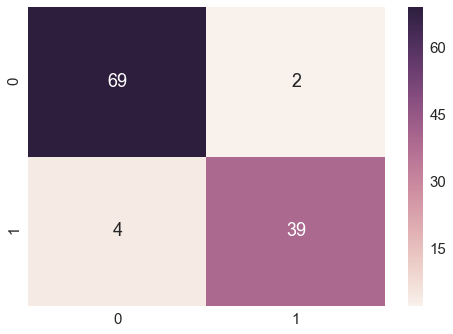

In [26]:
x_3 = x_1[['area_mean','compactness_worst','area_se']]

X3_train, X3_test, y3_train, y3_test = train_test_split(x_3, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier(max_depth=2,random_state=42)
model.fit(X3_train, y3_train)

ac = accuracy_score(y3_test,model.predict(X3_test))
ckappa=cohen_kappa_score(y3_test, model.predict(X3_test))

cm = confusion_matrix(y3_test,model.predict(X3_test))
sns.heatmap(cm,annot=True,fmt="d")

print('Accuracy is: ',ac)
print('Classification report: \n',classification_report(y3_test, model.predict(X3_test)))
print('Cohen Kappa Score is: ',ckappa)
print('\n Confusion Matrix: \n')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

** Looks like I still get similar performance. Lets see what the tree looks like and we can try to see how the cuts were made **

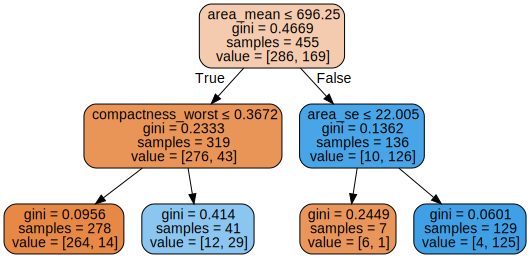

In [27]:
import graphviz 
from sklearn import tree
#dot_data = tree.export_graphviz(model, out_file=None) 
#graph = graphviz.Source(x_2) 
#graph.render("x_2")
#dot_data = tree.export_graphviz(clf_dtc, out_file=None, feature_names=X2_train.columns, class_names=[M,B], filled=True, rounded=True,  special_characters=True)  
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X3_train.columns,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data) 
plt.figure(figsize=(8,4))
graph 

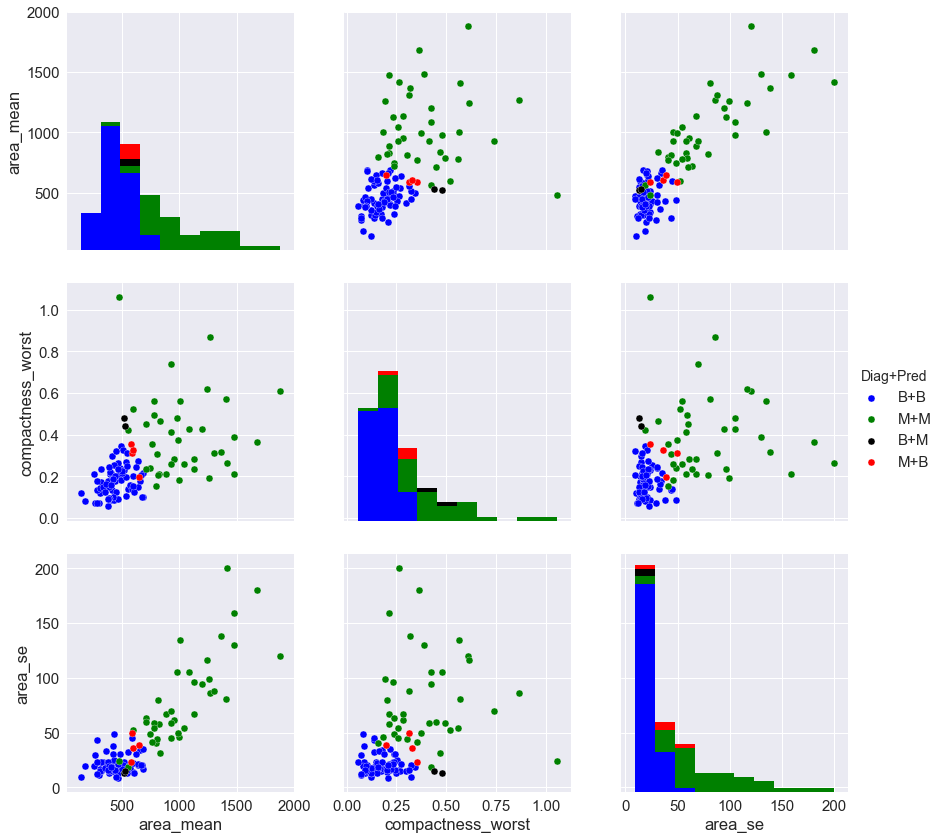

In [28]:
y3_pred=pd.DataFrame(model.predict(X3_test),index=X3_test.index,columns=['pred'])
x_3_BM_added_testonly = pd.concat([X3_test,y3_test,y3_pred],axis=1)
error=x_3_BM_added_testonly['pred']!=x_3_BM_added_testonly['diagnosis']
error_set=x_3_BM_added_testonly[error]
noerror=x_3_BM_added_testonly['pred']==x_3_BM_added_testonly['diagnosis']
noerror_set=x_3_BM_added_testonly[noerror]
x_3_BM_added_testonly['Diag+Pred']=x_3_BM_added_testonly['diagnosis']+'+'+x_3_BM_added_testonly['pred']
error_set.head()
#g = sns.PairGrid(error_set)
#g.map_upper(plt.scatter)
#g.map_lower(plt.scatter)
colorpal={'B+B':'blue','M+M':'green','B+M':'black','M+B':'red'}
sns.pairplot(x_3_BM_added_testonly,hue='Diag+Pred',size=4,palette=colorpal)
#sns.pairplot(x_3_BM_added,hue='diagnosis')
sns.axes_style()
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## Conclusion

 - Analyzed the data to develop a simple model for malignancy prediction
 - Identified 3 most important features which determine malignancy
 - It would be interesting to try more sophisticated models to see if accuracy increases : Random Forest
 - it would be interesting to try a different metric for hyperparameter tuning : Fbeta
 